In [1]:
import numpy as np
import pandas as pd
import math
import matplotlib.pyplot as plt

In [2]:
df = pd.read_csv('./data/Ads_CTR_Optimisation.csv') #Thanks Udemy _/\_
df.head()

,Ad 1,Ad 2,Ad 3,Ad 4,Ad 5,Ad 6,Ad 7,Ad 8,Ad 9,Ad 10
0,1,0,0,0,1,0,0,0,1,0
1,0,0,0,0,0,0,0,0,1,0
2,0,0,0,0,0,0,0,0,0,0
3,0,1,0,0,0,0,0,1,0,0
4,0,0,0,0,0,0,0,0,0,0


<br>
<br>
<br>
<img src="img/UCB_pseudocode.jpeg" width=600 height=600 />

In [3]:
''' Step 1 '''
N = len(df)                   # จำนวนรอบทั้งหมดที่เราจะทำการยิง ad
d = 10                        # จำนวน ad 
numbers_of_selections = [0]*d # N(n) จำนวนครั้งที่adsแต่ละตัวถูกexploit 
                              # เช่น [5, 0, ...] แปลว่า Ad ตัวที่1ถูกเลือกมาใช้แล้ว5ครั้ง ตัวที่2ถูกเลือก0ครั้ง ฯลฯ

sum_of_rewards = [0]*d        # R(n) ผลรวมrewardที่ adsแต่ละตัวสร้างไว้ 
                              # เช่น [120, 47, ...] แปลว่า Ad ตัวที่1มีrewardสะสม120คะแนน ตัวที่2 47คะแนน ฯลฯ

total_reward = 0              # reward รวมทั้งหมดที่เราได้รับขณะรันแคมเปญ


''' Step 2 '''
for n in range(N):
    ad = 0
    max_upper_bound = 0
    for i in range(d):
        if numbers_of_selections[i] > 0:
            r_hat = sum_of_rewards[i] / numbers_of_selections[i]             # Expected Value ของ Ad ตัวที่ i
            delta_i = (3/2 * math.log(n+1) / numbers_of_selections[i])**0.5  # Confidence Interval ของ Ad ตัวที่ i ณ รอบที่ n
            upper_bound = r_hat + delta_i                                    # ค่าUCB 
        else:
            upper_bound = 1e100
        
        if upper_bound > max_upper_bound:
            max_upper_bound = upper_bound
            ''' Step 3 '''
            ad = i    #เลือกAd ตัวที่มีค่าUCBมากที่สุดมา exploit
    
    numbers_of_selections[ad] += 1
    reward = df.values[n, ad]
    sum_of_rewards[ad] += reward
    total_reward += reward

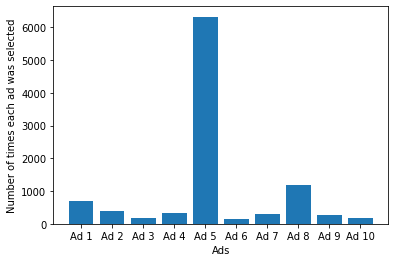

In [4]:
plt.bar(df.columns, numbers_of_selections)
plt.xlabel('Ads')
plt.ylabel('Number of times each ad was selected')
plt.show()

In [5]:
print(df.sum())
print(total_reward)

Ad 1     1703
Ad 2     1295
Ad 3      728
Ad 4     1196
Ad 5     2695
Ad 6      126
Ad 7     1112
Ad 8     2091
Ad 9      952
Ad 10     489
dtype: int64
2178


<h3>ถ้าเรายิงแต่Ad 5 หรือ Ad 8 เราจะได้2000++คะแนน แน่ๆ จริงมั้ย? </h3><br> 
แต่ประเด็นคือ ตอนเรากำลังรันแคมเปญเนี่ย เราไม่รู้หรอกว่าadอันไหนดีที่สุด<br>
การที่เราต้องเจอกับExplore-Exploit Dilemma และสามารถทำคะแนนได้ 2178 ถือว่าดีมากในโลกแห่งความเป็นจริง<br>
แถมทำให้เรารู้ว่าAd 5 คือ Ad ตัวที่ดีที่สุดจริงๆ

<b>แล้วถ้าหากในความเป็นจริงเรารันแคมเปญที่ว่านี้แค่400รอบล่ะ?</b>

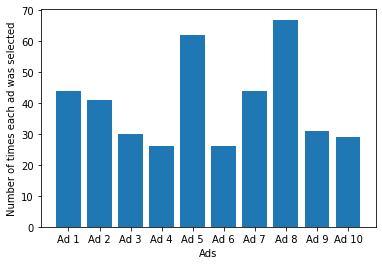

Total Reward : 49


In [6]:
N = 400                  
d = 10                         
numbers_of_selections = [0]*d 
sum_of_rewards = [0]*d         
total_reward = 0              


for n in range(N):
    ad = 0
    max_upper_bound = 0
    for i in range(d):
        if numbers_of_selections[i] > 0:
            r_hat = sum_of_rewards[i] / numbers_of_selections[i]             
            delta_i = (3/2 * math.log(n+1) / numbers_of_selections[i])**0.5
            upper_bound = r_hat + delta_i    
        else:
            upper_bound = 1e100
        
        if upper_bound > max_upper_bound:
            max_upper_bound = upper_bound
            ad = i    
    
    numbers_of_selections[ad] += 1
    reward = df.values[n, ad]
    sum_of_rewards[ad] += reward
    total_reward += reward

plt.bar(df.columns, numbers_of_selections)
plt.xlabel('Ads')
plt.ylabel('Number of times each ad was selected')
plt.show()

print("Total Reward :", total_reward)

ดูเหมือนว่าพอเป็น400รอบ UCBกลับไม่เวิร์คขึ้นมาซะอย่างงั้น...

<b>สรุป</b> UCBจะมีประสิทธิภาพมากขึ้น หากเรามีจำนวนรอบให้Exploreมากขึ้น และแน่นอนว่ามันเวิร์คกว่า A/B Testing!